# Analysis notebook: `SU2020b_signal_mix2BB_onspill-LH_aw`  

## Define analysis name

In [1]:
ana_label = "SU2020b_signal_mix2BB_onspill-LH_aw"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020b_signal_mix2BB_onspill-LH_aw

analysis.csv  hists.h5	   SU2020b_signal_mix2BB_onspill-LH_aw.log
cut_flow.csv  results.pkl  SU2020b_signal_mix2BB_onspill-LH_aw.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020b_signal_mix2BB_onspill-LH_aw


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020b_signal_mix2BB_onspill-LH_aw/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020b_signal_mix2BB_onspill-LH_aw/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020b_signal_mix2BB_onspill-LH_aw/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020b_signal_mix2BB_onspill-LH_aw/analysis.csv
[Load] ⚠️ File not found: ../../../output/results/SU2020b_signal_mix2BB_onspill-LH_aw/events.parquet
[Load] ⚠️ File not found: ../../../output/results/SU2020b_signal_mix2BB_onspill-LH_aw/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,1339362,100,100,No selection applied
1,has_trk_front,Preselect,1336979,99.822,99.822,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,1327530,99.117,99.293,Electron track fits
3,one_reco_electron,Preselect,1097141,81.915,82.645,One reco electron / event
4,is_downstream,Preselect,1096140,81.840,99.909,Downstream tracks (p_z > 0 at tracker entrance)
5,is_truth_electron,Preselect,1096071,81.835,99.994,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,883135,65.937,80.573,Track fit quality > 0.2
7,within_t0,Tracker,655448,48.937,74.218,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,within_t0err,Tracker,636331,47.510,97.083,Track fit t0 uncertainty (t0err < 0.9 ns)
9,has_hits,Tracker,621996,46.440,97.747,>20 active tracker hits


### Efficiency & rates

In [8]:
display(results["analysis"])

None

### Histograms

In [9]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Load] ✅ Initialised with out_path=test_out
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020b_signal_mix2BB_onspill-LH_aw/h1o_1x3_mom_windows.png


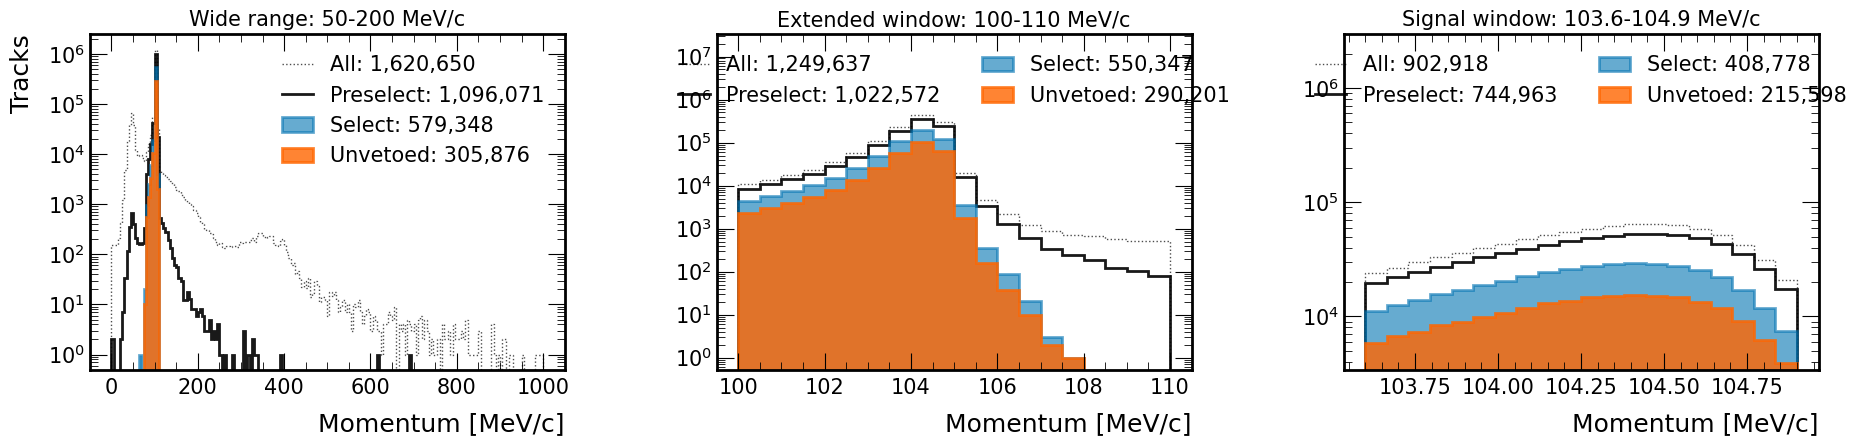

In [10]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_signal_mix2BB_onspill-LH_aw/h1o_3x3_summary.png


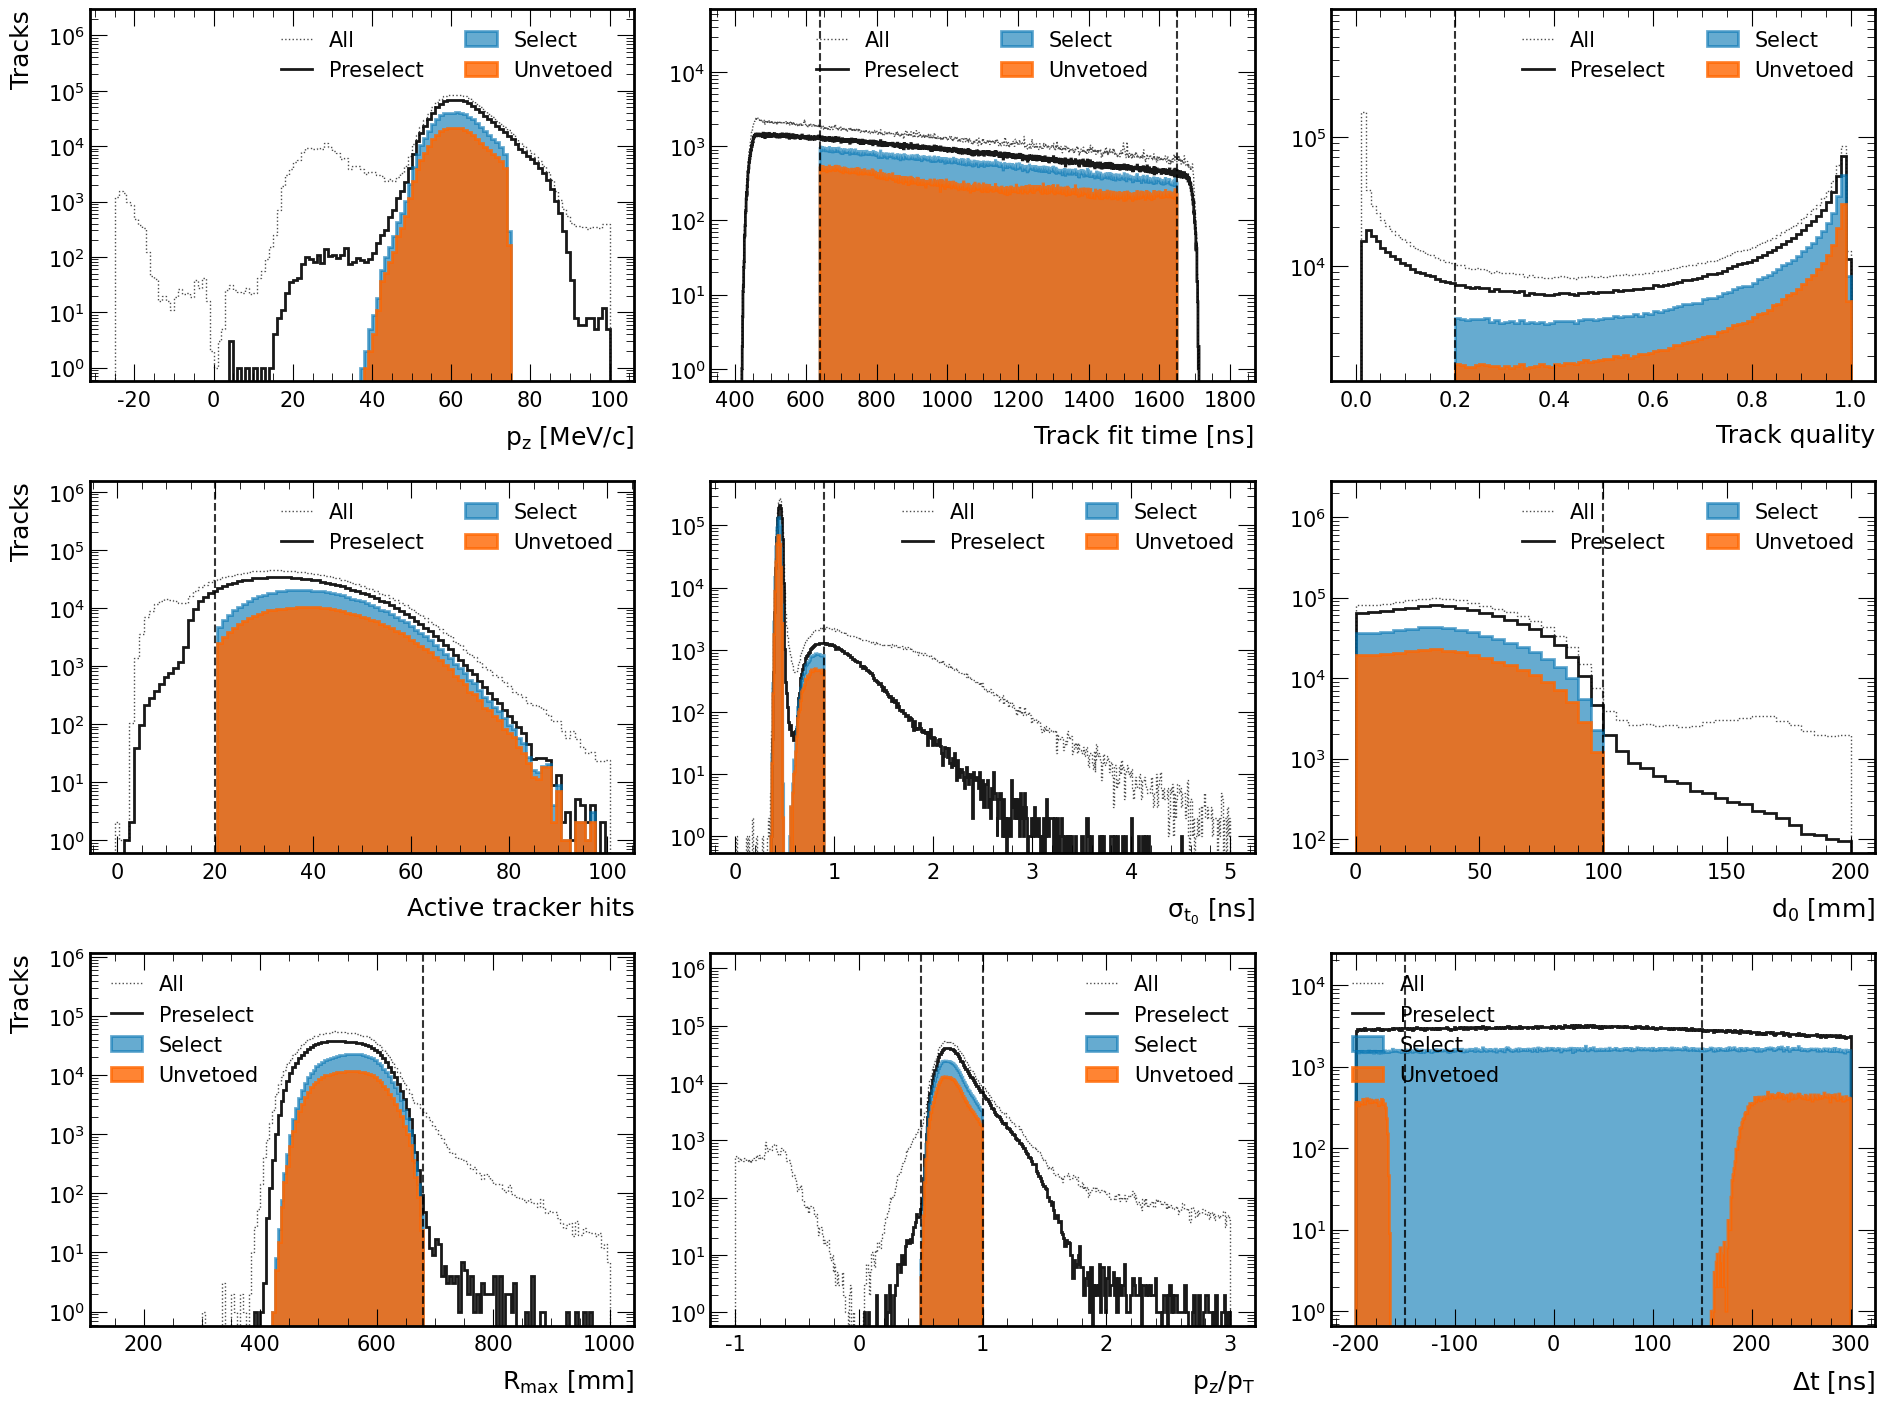

In [11]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_signal_mix2BB_onspill-LH_aw/h1o_2x2_mom_summary.png


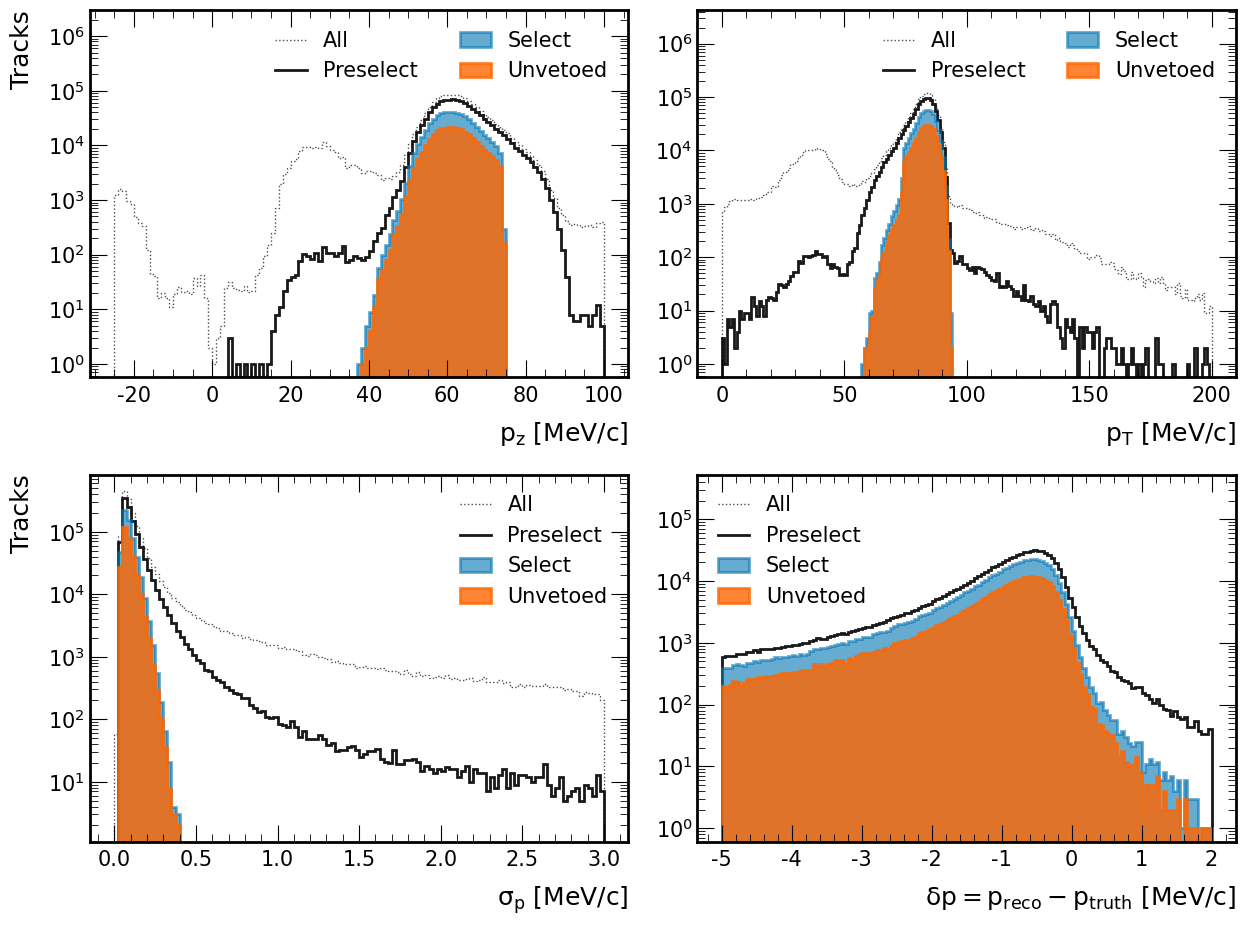

In [12]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_signal_mix2BB_onspill-LH_aw/h1o_crv_z.png


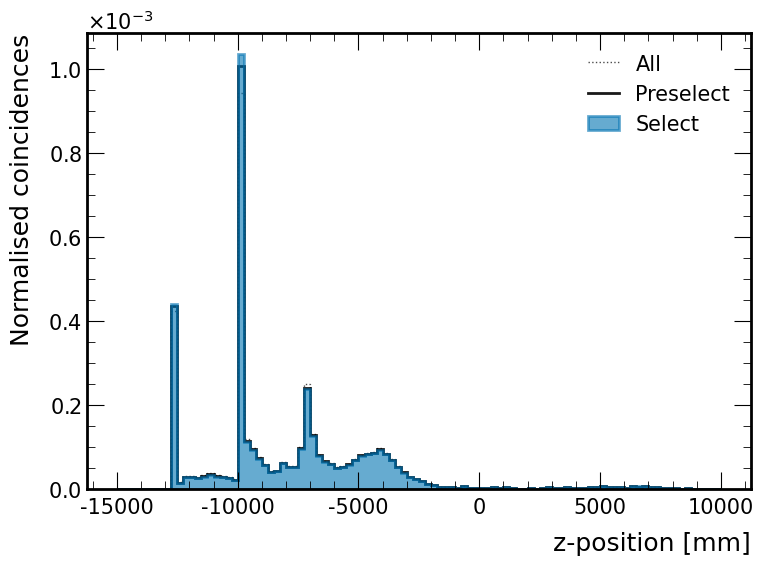

In [13]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [14]:
print(results["event_info"])

None


In [15]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))